In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import regions
from astropy.table import *
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS

In [2]:
import matplotlib
import os

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### load tables

In [3]:
# SHIRAZ catalog
ch = 'CH1'
cat = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_'+ch+'_newfluxes_errmod.fits')

useful_params =['MAG_APER','MAG_APER_1','MAG_APER_2','MAG_APER_3','MAG_APER_4','MAG_APER_5','MAG_APER_6','MAG_APER_7',
               'MAG_AUTO','ALPHA_J2000','DELTA_J2000']
cat = cat[useful_params]

# rename the columns to include filter name
for param in useful_params:
    cat.rename_column(param,param+'_'+ch)
cat.write('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_'+ch+'_trim.fits',overwrite=True)

In [122]:
# COSMOS2020
cat = Table.read('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_sfAdded.fits')

# keep the IRAC and i,r,z magnitudes only from the photometric catalog of COSMOS2020
useful_params =['ALPHA_J2000','DELTA_J2000','IRAC_CH1_MAG','IRAC_CH2_MAG','HSC_i_MAG_AUTO','HSC_r_MAG_AUTO','HSC_z_MAG_AUTO','CLASS']
cat = cat[useful_params]

# rename the columns to include filter name
for param in useful_params:
    cat.rename_column(param,param+'_'+'cosmos')
cat.write('/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim_column_renamed.fits',overwrite=True)

In [124]:
cat.keys()

['ALPHA_J2000_cosmos',
 'DELTA_J2000_cosmos',
 'IRAC_CH1_MAG_cosmos',
 'IRAC_CH2_MAG_cosmos',
 'HSC_i_MAG_AUTO_cosmos',
 'HSC_r_MAG_AUTO_cosmos',
 'HSC_z_MAG_AUTO_cosmos',
 'CLASS_cosmos']

### match with Vincent's catalog

In [98]:
cat = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_trim.fits')
print(cat.keys())

['MAG_APER_CH1', 'MAG_APER_1_CH1', 'MAG_APER_2_CH1', 'MAG_APER_3_CH1', 'MAG_APER_4_CH1', 'MAG_APER_5_CH1', 'MAG_APER_6_CH1', 'MAG_APER_7_CH1', 'MAG_AUTO_CH1', 'ALPHA_J2000_CH1', 'DELTA_J2000_CH1']


In [32]:
# SHIRAZ catalogs
cat_shiraz_ch1_name = '/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_trim.fits'
cat_shiraz_ch2_name = '/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH2_trim.fits'

# COSMOS2020 photometry
cat_cosmo2020_photometry_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim_column_renamed.fits'

# cosmos2020 matched COSMOS_deep catalog
# cat_v8_name = 'COSMOS2020_Laigle_Vincent_added.fits' # all cosmos_deep objects
cat_v8_name = 'COSMOS2020_Laigle_Vincent_uddd_added.fits' # uddd only objects (6 band)

combined_cat_name = 'COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits'

In [33]:
# match CH1 and v8
cmd = 'java -jar stilts.jar tmatch2 in1='+ cat_v8_name + \
                ' in2='+cat_shiraz_ch1_name+' find=best1 join=all1 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000_CH1 DELTA_J2000_CH1" out='+combined_cat_name
os.system(cmd)
print(cmd)
cat_added = Table.read(combined_cat_name)
cat_added.remove_columns(['ALPHA_J2000_CH1','DELTA_J2000_CH1','Separation'])
cat_added.write(combined_cat_name,overwrite=True)

#match with CH2
cmd = 'java -jar stilts.jar tmatch2 in1='+ combined_cat_name + \
                ' in2='+cat_shiraz_ch2_name+' find=best1 join=all1 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000_CH2 DELTA_J2000_CH2" out='+combined_cat_name
os.system(cmd)
print(cmd)
cat_added = Table.read(combined_cat_name)
cat_added.remove_columns(['ALPHA_J2000_CH2','DELTA_J2000_CH2','Separation'])
cat_added.write(combined_cat_name,overwrite=True)

#match with cosmos2020 photo cat
cmd = 'java -jar stilts.jar tmatch2 in1='+ combined_cat_name + \
                ' in2='+cat_cosmo2020_photometry_name+' find=best1 join=all1 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000_cosmos DELTA_J2000_cosmos" out='+combined_cat_name
os.system(cmd)
print(cmd)
cat_added = Table.read(combined_cat_name)
cat_added.remove_columns(['ALPHA_J2000_cosmos','DELTA_J2000_cosmos','Separation'])
cat_added.write(combined_cat_name,overwrite=True)


java -jar stilts.jar tmatch2 in1=COSMOS2020_Laigle_Vincent_uddd_added.fits in2=/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_trim.fits find=best1 join=all1 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000_CH1 DELTA_J2000_CH1" out=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits
java -jar stilts.jar tmatch2 in1=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits in2=/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH2_trim.fits find=best1 join=all1 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000_CH2 DELTA_J2000_CH2" out=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits
java -jar stilts.jar tmatch2 in1=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_v1.8.1_formatted_trim_column_renamed.fits find=best1 join=all1 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000_cosmos DELTA_J2000_cosmos" out=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits


In [34]:
cat_added = Table.read('COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits')
print(cat_added.info)

<Table masked=True length=488168>
         name          dtype  unit n_bad 
--------------------- ------- ---- ------
                   RA float64           0
                  DEC float64           0
                 Z_ML float64           0
                 ZPDF float32           0
      MASS_MED_COSMOS float32           0
             MASS_MED float64           0
             SSFR_MED float64           0
                    r float64           0
                    i float64           0
                    z float64           0
                CLASS float64           0
                   MU float32           0
                   MR float32           0
                   MZ float32           0
                   MK float32           0
                 MNUV float32           0
                 mask float32           0
                 type float32           0
          MAG_ABS_NUV float64           0
            MAG_ABS_r float64           0
            MAG_ABS_z float64           0


### statistics

In [10]:
# matched fraction

cat_shiraz_ch1 = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_trim.fits')
cat_shiraz_ch2 = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH2_trim.fits')
cat_added_matched_ch1 = cat_added[~np.isnan(cat_added['MAG_APER_CH1'])]
cat_added_matched_ch2 = cat_added[~np.isnan(cat_added['MAG_APER_CH1'])]
print(len(cat_added_matched_ch1)/len(cat_added))
print(len(cat_added_matched_ch2)/len(cat_added))

0.24370708444633815
0.24370708444633815


/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


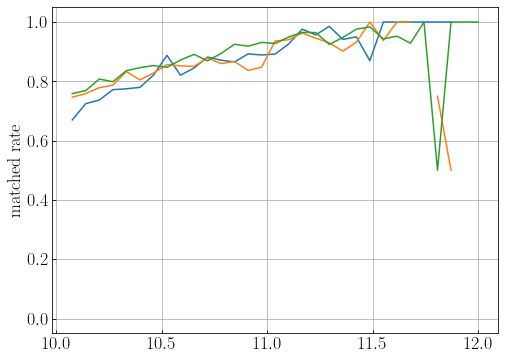

In [127]:
# matched fraction at different masses
fig = plt.figure(figsize=(8,6))

for z in [0.4, 0.6, 0.8]:
    cat_added_z = cat_added[cat_added['ZPHOT']>z-0.1]
    cat_added_z = cat_added_z[cat_added_z['ZPHOT']<z+0.1]
    cat_added_matched_z = cat_added_matched_ch1[cat_added_matched_ch1['ZPHOT']>z-0.1]
    cat_added_matched_z = cat_added_matched_z[cat_added_matched_z['ZPHOT']<z+0.1]
    
    mass_bins = np.linspace(10,12.5,40)
    counts = np.histogram(cat_added_z['MASS_MED_COSMOS'],bins=mass_bins)[0]
    counts_matched = np.histogram(cat_added_matched_z['MASS_MED_COSMOS'],bins=mass_bins)[0]
    
    plt.plot(mass_bins[:-1]+0.075,counts_matched/counts)
    plt.ylabel('matched rate', fontsize=18)
    plt.grid()

/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


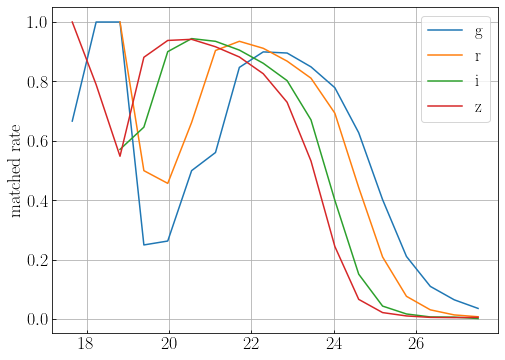

In [165]:
fig = plt.figure(figsize=(8,6))
mag_bins = np.linspace(17,28,20)
for band in ['g','r','i','z']:
    counts = np.histogram(cat_added_z[band],bins=mag_bins)[0]
    counts_matched = np.histogram(cat_added_detected_z[band],bins=mag_bins)[0]
    
    plt.plot(mag_bins[:-1]+0.075,counts_matched/counts,label=band)
plt.ylabel('matched rate', fontsize=18)
plt.grid()
plt.legend(fontsize=17)

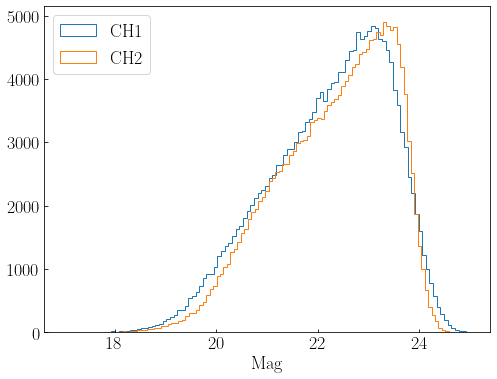

In [105]:
fig = plt.figure(figsize=(8,6))
plt.hist(cat_added['MAG_APER_CH1'],range=(17,25),histtype='step',bins='scott',label='CH1')
plt.hist(cat_added['MAG_APER_CH2'],range=(17,25),histtype='step',bins='scott',label='CH2')
plt.legend(fontsize=18,loc='upper left')
plt.xlabel('Mag',fontsize=18)
plt.show()

In [112]:
cat_added = cat_added[cat_added['MAG_APER_CH1']<23]

(-2, 8)

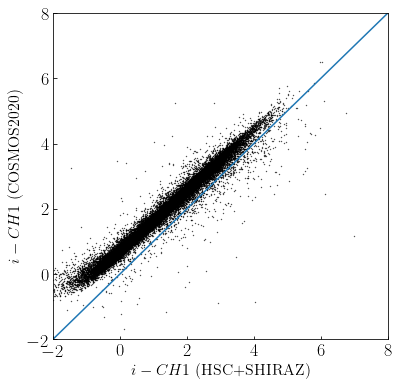

In [113]:
fig = plt.figure(figsize=(6,6))
plt.scatter(cat_added['i'] - cat_added['MAG_APER_CH1'],cat_added['HSC_i_MAG_AUTO_cosmos']-cat_added['IRAC_CH1_MAG_cosmos'],s=0.1,color='k')
plt.xlabel(r'$i-CH1$ (HSC+SHIRAZ)',fontsize=16)
plt.ylabel(r'$i-CH1$ (COSMOS2020)',fontsize=16)
plt.plot([-2,8],[-2,8])
plt.xlim([-2,8])
plt.ylim([-2,8])

(-2, 8)

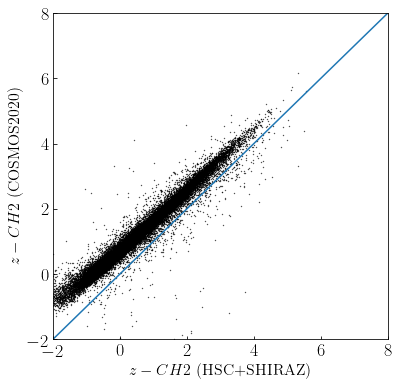

In [114]:
fig = plt.figure(figsize=(6,6))
plt.scatter(cat_added['z'] - cat_added['MAG_APER_CH2'],cat_added['HSC_z_MAG_AUTO_cosmos']-cat_added['IRAC_CH2_MAG_cosmos'],s=0.1,color='k')
plt.xlabel(r'$z-CH2$ (HSC+SHIRAZ)',fontsize=16)
plt.ylabel(r'$z-CH2$ (COSMOS2020)',fontsize=16)
plt.plot([-2,8],[-2,8])
plt.xlim([-2,8])
plt.ylim([-2,8])

### SF/Q plots

In [216]:
z=0.8
z_maglimit = 24
cat_added_bright = cat_added[cat_added['z']<z_maglimit]
cat_added_bright = cat_added_bright[cat_added_bright['ZPHOT']>z-0.1]
cat_added_bright = cat_added_bright[cat_added_bright['ZPHOT']<z+0.1]
cat_added_bright_sf = cat_added_bright[cat_added_bright['CLASS']==1]
cat_added_bright_q = cat_added_bright[cat_added_bright['CLASS']==0]

(0, 7)

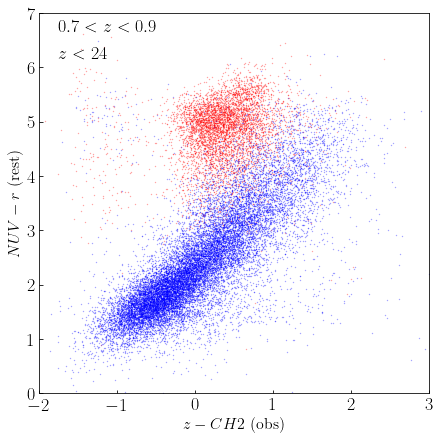

In [217]:
fig = plt.figure(figsize=(7,7))

plt.scatter(cat_added_bright_q['z']-cat_added_bright_q['MAG_APER_CH2'],
            cat_added_bright_q['MAG_ABS_NUV'] - cat_added_bright_q['MAG_ABS_r'],s=0.1,alpha=0.5,color='r')
plt.scatter(cat_added_bright_sf['z']-cat_added_bright_sf['MAG_APER_CH2'],
            cat_added_bright_sf['MAG_ABS_NUV'] - cat_added_bright_sf['MAG_ABS_r'],s=0.1,alpha=0.5,color='b')

plt.xlabel(r'$z-CH2$ (obs)',fontsize=16)
plt.ylabel(r'$NUV-r$ (rest)',fontsize=16)

plt.annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.05,0.95]),
             xycoords='axes fraction',fontsize=18)
plt.annotate(r'$z<'+str(z_maglimit)+'$',xy=([0.05,0.88]),
             xycoords='axes fraction',fontsize=18)

plt.xlim([-2,3])
plt.ylim([0,7])

(-1, 2)

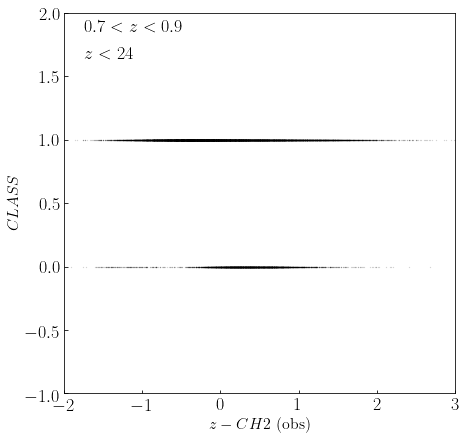

In [218]:
fig = plt.figure(figsize=(7,7))

plt.scatter(cat_added_bright['z']-cat_added_bright['MAG_APER_CH2'],
            cat_added_bright['CLASS'],s=0.05,alpha=0.3,color='k')

plt.xlabel(r'$z-CH2$ (obs)',fontsize=16)
plt.ylabel(r'$CLASS$',fontsize=16)
plt.annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.05,0.95]),
             xycoords='axes fraction',fontsize=18)
plt.annotate(r'$z<'+str(z_maglimit)+'$',xy=([0.05,0.88]),
             xycoords='axes fraction',fontsize=18)

plt.xlim([-2,3])
plt.ylim([-1,2])

### match central cat to COSMOS and SHIRAZ

In [35]:
cat_name = 'COSMOS_deep'
cat_shiraz_added_name = 'COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits'
for i,z in enumerate([0.4, 0.6, 0.8]):
    # read in central cats
    central_cat_name_full = 'CUT_deep_catalogs/radial_dist_code/central_cat/'+\
                            'isolated_'+cat_name+'_11.15_'+str(z)+'_massive.positions.fits'
    cat_central = Table.read(central_cat_name_full)
    number_central = len(cat_central)
        
    # match with SHIRAZ added catalog (exact match)
    central_SHIRAZ_added_name = central_cat_name_full.replace('_massive.positions.fits','_central_SHIRAZ_added.fits')
    cat_shiraz_added_name = 'COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits'
    cmd = 'java -jar stilts.jar tmatch2 in1='+ central_cat_name_full + \
                ' in2='+cat_shiraz_added_name+' find=best join=all1 matcher=sky params=0.01 values1="RA DEC"' + \
                ' values2="RA DEC" out='+central_SHIRAZ_added_name
    print(cmd)
    os.system(cmd)

    central_shiraz_added = Table.read(central_SHIRAZ_added_name)
    number_central_shiraz_added = len(central_shiraz_added)
    print(z, number_central_shiraz_added,number_central )
    for key in central_shiraz_added.keys():
        if 'Group' in key:
            central_shiraz_added.remove_column(key)
        elif '_1' in key and '_1_' not in key:
            central_shiraz_added.rename_column(key,key.replace('_1',''))
        elif '_2' in key and '_2_' not in key:
            central_shiraz_added.remove_column(key)
        
    # write to file
    central_shiraz_added.write(central_SHIRAZ_added_name, overwrite=True)
    

java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_0.4_massive.positions.fits in2=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits find=best join=all1 matcher=sky params=0.01 values1="RA DEC" values2="RA DEC" out=CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_0.4_central_SHIRAZ_added.fits
0.4 304 304
java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_0.6_massive.positions.fits in2=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits find=best join=all1 matcher=sky params=0.01 values1="RA DEC" values2="RA DEC" out=CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_0.6_central_SHIRAZ_added.fits
0.6 239 239
java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_0.8_massive.positions.fits in2=COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits find=best join=all1 matcher=sky params=0.01 values1="RA DE

339 309


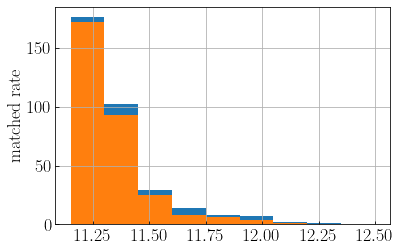

In [115]:
z=0.4
cat_shiraz_added = Table.read('COSMOS2020_Laigle_Vincent_SHIRAZ_added.fits')
cat_shiraz_added = cat_shiraz_added[cat_shiraz_added['MASS_MED']>11.15]
cat_shiraz_added_z = cat_shiraz_added[cat_shiraz_added['ZPHOT']>z-0.1]
cat_shiraz_added_z = cat_shiraz_added_z[cat_shiraz_added_z['ZPHOT']<z+0.1]

cat_shiraz_matched_z = cat_shiraz_added_z[~np.isnan(cat_shiraz_added_z['MAG_APER_CH1'])]
print(len(cat_shiraz_added_z),len(cat_shiraz_matched_z))
mass_bins = np.linspace(11.15,12.5,10)
plt.hist(cat_shiraz_added_z['MASS_MED'],bins=mass_bins)
plt.hist(cat_shiraz_matched_z['MASS_MED'],bins=mass_bins)

plt.ylabel('matched rate', fontsize=18)
plt.grid()
plt.show()
plt.close()


### SF/Q plots for massive centrals

In [28]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,mark_inset)
from astropy.cosmology import Planck13
from sklearn.neighbors import KernelDensity
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pickle
import os

/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """Entry point for launching an IPython kernel.


In [29]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z, **params)
    return out

In [30]:
ic_1 = np.linspace(3.5, 5, 10)
ic_2 = np.linspace(2.5, 4.3, 13)
slope = np.linspace(1, 3, 15)
ic_1_mesh, ic_2_mesh, slope_mesh = np.meshgrid(ic_1, ic_2, slope, indexing='ij')

# define SVM and binary selection box
def gv_boundary_2(color1, ic_1, ic_2, slope):
    nuv_1 = ic_1
    nuv_2 = slope*color1 + ic_2
    return np.maximum(nuv_1, nuv_2)

def fraction_score(cat, ic_1, ic_2, slope,diagram_type='nuvrk'):
    if diagram_type=='ch1':
        color1 = cat['r'] - cat['MAG_APER_CH1']
    elif diagram_type=='ch2':
        color1 = cat['z'] - cat['MAG_APER_CH2']
    else:
        return 1
    delta_gv = cat['MAG_ABS_NUV'] - cat['MAG_ABS_r'] - gv_boundary_2(color1, ic_1, ic_2, slope)
    
    q = delta_gv > 0
    sf = delta_gv < 0
    true_q = cat['CLASS']==0      
    true_sf = cat['CLASS']!=0
    
    FP = sum(true_sf*q)  # false positive
    TP = sum(true_q*q)   # true positive
    FN = sum(true_q*sf)  # false negative
    TN = sum(true_sf*sf) # true negative
    
    fc = FP/(TP+FP)
    fm = FN/(TP+FN)
    return fc, fm, fc+fm+abs(fc-fm)

In [42]:
# train SVM and binary selection box
zs = [0.4, 0.6, 0.8]

best_box = []
for i in range(3):
    z = zs[i]
    central_shiraz_added_z = Table.read('CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_'+str(z)+'_central_SHIRAZ_added.fits')

    print(z,len(central_shiraz_added_z))
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_APER_CH2'])]
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_APER_CH1'])]
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_ABS_z'])]
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_ABS_r'])]
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_ABS_NUV'])]
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['z'])]
#     central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['r'])]
    print(z,len(central_shiraz_added_z))

0.4 304
0.4 19
0.6 239
0.6 20
0.8 675
0.8 42


In [36]:
# train SVM and binary selection box
zs = [0.4, 0.6, 0.8]

best_box = []
for i in range(3):
    z = zs[i]
    central_shiraz_added_z = Table.read('CUT_deep_catalogs/radial_dist_code/central_cat/isolated_COSMOS_deep_11.15_'+str(z)+'_central_SHIRAZ_added.fits')

    print(z,len(central_shiraz_added_z))
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_APER_CH2'])]
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_APER_CH1'])]
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_ABS_z'])]
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_ABS_r'])]
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['MAG_ABS_NUV'])]
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['z'])]
    central_shiraz_added_z = central_shiraz_added_z[~np.isnan(central_shiraz_added_z['r'])]
    print(z,len(central_shiraz_added_z))
    
    # construct input and labels for SVM
    if z == 0.4:
        rk = central_shiraz_added_z['r'] - central_shiraz_added_z['MAG_APER_7_CH1']
    else:
        rk = central_shiraz_added_z['z'] - central_shiraz_added_z['MAG_APER_7_CH2']
    nuvr = central_shiraz_added_z['MAG_ABS_NUV'] - central_shiraz_added_z['MAG_ABS_r']
    x=np.c_[np.array(rk),np.array(nuvr)]  # nuv r k colors as inputs
    y=central_shiraz_added_z['CLASS']==0  # COSMOS2020 training labels
    
    # 5-fold CV for best hyperparameter gamma and C
    svm_cv=GridSearchCV(svm.SVC(kernel='rbf'),{'gamma': np.linspace(0.1, 0.3, 50), 'C' : np.linspace(0.02,0.5,50)}, 
                    scoring={'AUC': 'roc_auc'}, refit='AUC', cv = 5, return_train_score=True)
    random_ids = np.random.randint(low=0,high=len(central_shiraz_added_z),size=100)
    svm_cv.fit(x[random_ids],y[random_ids])
    gamma = svm_cv.best_params_['gamma']
    C = svm_cv.best_params_['C']
    print('gamma=%.3f, C=%.3f, mean AUC of best model: %.3f' % (gamma,C,svm_cv.best_score_))
    
    # train the SVM model
    clf = svm.SVC(kernel='rbf', gamma=gamma, C=C,  probability=True)   # the svm classifier
    clf.fit(x, y)

    # save the SVM estimator through pickle
    pkl_filename = 'pickle_svm_z_shiraz_'+str(i)+'.pkl'
    with open(pkl_filename, 'wb') as file:
        pickle.dump(clf, file)
        
    # train the binary selection box
    scores = []
    fcs = []
    fms = []
    for i in range(len(ic_1_mesh.ravel())):
        if z == 0.4:
            diagram_type = 'ch1'
        else:
            diagram_type = 'ch2'
        fc,fm,score = fraction_score(central_shiraz_added_z, ic_1_mesh.ravel()[i], ic_2_mesh.ravel()[i],
                                           slope_mesh.ravel()[i],diagram_type=diagram_type)
        if score >= 0:
            scores.append(score)
            fcs.append(fc)
            fms.append(fm)
        else:
            scores.append(999.)
    
    # best parameters
    best_id = np.argmin(np.array(scores))
    ic_1,ic_2,slope = ic_1_mesh.ravel()[best_id], ic_2_mesh.ravel()[best_id], slope_mesh.ravel()[best_id]
    best_box.append([ic_1,ic_2,slope])
    print(i,best_id,[ic_1,ic_2,slope])
    print(fcs[best_id],fms[best_id])
    print(' ')
    

    np.save('best_select_box_shiraz_one_mass_bin.npy',np.array(best_box))

0.4 304
0.4 19
gamma=0.263, C=0.020, mean AUC of best model: 0.947
1949 1055 [4.333333333333333, 3.25, 1.7142857142857142]
0.15384615384615385 0.15384615384615385
 
0.6 239
0.6 20
gamma=0.263, C=0.020, mean AUC of best model: 0.914
1949 1365 [4.666666666666666, 2.5, 1.0]
0.15384615384615385 0.15384615384615385
 
0.8 675
0.8 42
gamma=0.100, C=0.020, mean AUC of best model: 0.992
1949 8 [3.5, 2.5, 2.142857142857143]
0.029411764705882353 0.029411764705882353
 


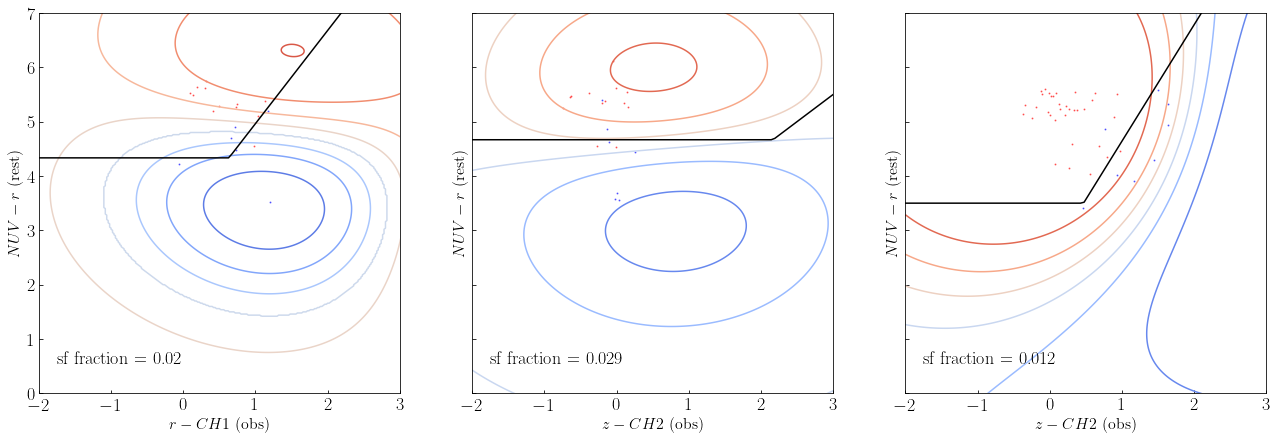

In [37]:
fig, axs = plt.subplots(1, 3, figsize=(22,7),sharex=True, sharey=True)
best_box = np.load('best_select_box_shiraz_one_mass_bin.npy')

for i,z in enumerate([0.4, 0.6, 0.8]):

    # read in central cats
    central_shiraz_added = Table.read('CUT_deep_catalogs/radial_dist_code/central_cat/isolated_'+\
                                 cat_name+'_11.15_'+str(z)+'_central_SHIRAZ_added.fits')
    central_shiraz_added_sf = central_shiraz_added[central_shiraz_added['CLASS']==1]
    central_shiraz_added_q = central_shiraz_added[central_shiraz_added['CLASS']==0]
    number_sf = len(central_shiraz_added_sf)
    number = len(central_shiraz_added)
        
    # plot
    if z > 0.5:
        axs[i].scatter(central_shiraz_added_q['z']-central_shiraz_added_q['MAG_APER_CH2'],
            central_shiraz_added_q['MAG_ABS_NUV'] - central_shiraz_added_q['MAG_ABS_r'],s=1,alpha=0.5,color='r')
        axs[i].scatter(central_shiraz_added_sf['z']-central_shiraz_added_sf['MAG_APER_CH2'],
            central_shiraz_added_sf['MAG_ABS_NUV'] - central_shiraz_added_sf['MAG_ABS_r'],s=1,alpha=0.5,color='b')

        axs[i].set_xlabel(r'$z-CH2$ (obs)',fontsize=16)
        axs[i].set_ylabel(r'$NUV-r$ (rest)',fontsize=16)
        axs[i].set_xlim([-2,3])
        axs[i].set_ylim([0,7])
    else:
        axs[i].scatter(central_shiraz_added_q['r']-central_shiraz_added_q['MAG_APER_CH1'],
            central_shiraz_added_q['MAG_ABS_NUV'] - central_shiraz_added_q['MAG_ABS_r'],s=1,alpha=0.5,color='r')
        axs[i].scatter(central_shiraz_added_sf['r']-central_shiraz_added_sf['MAG_APER_CH1'],
            central_shiraz_added_sf['MAG_ABS_NUV'] - central_shiraz_added_sf['MAG_ABS_r'],s=1,alpha=0.5,color='b')

        axs[i].set_xlabel(r'$r-CH1$ (obs)',fontsize=16)
        axs[i].set_ylabel(r'$NUV-r$ (rest)',fontsize=16)
        axs[i].set_xlim([-2,3])
        axs[i].set_ylim([0,7])
        
    # annotations
    axs[i].annotate('sf fraction = '+str(round(number_sf/number,3)),
                        xy=([0.05,0.08]),xycoords='axes fraction',fontsize=18)
    
    # plot selection boxes
    with open('pickle_svm_z_shiraz_'+str(i)+'.pkl', 'rb') as file:
        clf_load = pickle.load(file)
    xx, yy = make_meshgrid(np.linspace(-1,3,100), np.linspace(-1,7,100))
    plot_contours(axs[i], clf_load, xx, yy, cmap=plt.cm.coolwarm_r)
    
    rk_draw = np.linspace(-2,3,100)
    nuv_draw_mid = gv_boundary_2(rk_draw,best_box[i][0],best_box[i][1],best_box[i][2])
    axs[i].plot(rk_draw, nuv_draw_mid, color='k')